# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №2: Линейные модели


###### <hr\>
**Общая информация**

**Срок сдачи:** 09 ноября 18:00 Сдача **очная** на онлайн занятии. <br\>


Используйте данный Ipython Notebook при оформлении домашнего задания.

Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0920, Задание 2] Фамилия Имя.



**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw2.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст, если явно не указана такая возможность. В противном случае -1 балл
<hr\>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 5)

Здравствуйте, уважаемые студенты! 

В этом задании мы будем реализовать линейные модели. Необходимо реализовать линейную и логистическую регрессии с L2 регуляризацией

# Теоретическое введение



Линейная регрессия решает задачу регрессии и оптимизирует функцию потерь MSE 

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right], $$ где $y_i$ $-$ целевая функция,  $a_i = a(x_i) =  \langle\,x_i,w\rangle ,$ $-$ предсказание алгоритма на объекте $x_i$, $w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Не забываем, что здесь и далее  мы считаем, что в $x_i$ есть тождественный вектор единиц, ему соответствует вес $w_0$.


Логистическая регрессия является линейным классификатором, который оптимизирует так называемый функционал log loss:

$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right],$$
где  $y_i  \in \{0,1\}$ $-$ метка класса, $a_i$ $-$ предсказание алгоритма на объекте $x_i$. Модель пытается предсказать апостериорую вероятность объекта принадлежать к классу "1":
$$ p(y_i = 1 | x_i) = a(x_i) =  \sigma( \langle\,x_i,w\rangle ),$$
$w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Функция $\sigma(x)$ $-$ нелинейная функция, пероводящее скалярное произведение объекта на веса в число $\in (0,1)$ (мы же моделируем вероятность все-таки!)

$$\sigma(x) = \frac{1}{1 + \exp(-x)}$$

Если внимательно посмотреть на функцию потерь, то можно заметить, что в зависимости от правильного ответа алгоритм штрафуется или функцией $-\log a_i$, или функцией $-\log (1 - a_i)$.



Часто для решения проблем, которые так или иначе связаны с проблемой переобучения, в функционал качества добавляют слагаемое, которое называют ***регуляризацией***. Итоговый функционал для линейной регрессии тогда принимает вид:

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right] + \frac{1}{C}R(w) $$

Для логистической: 
$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right] +  \frac{1}{C}R(w)$$

Самое понятие регуляризации введено основателем ВМК академиком Тихоновым https://ru.wikipedia.org/wiki/Метод_регуляризации_Тихонова

Идейно методика регуляризации заключается в следующем $-$ мы рассматриваем некорректно поставленную задачу (что это такое можно найти в интернете), для того чтобы сузить набор различных вариантов (лучшие из которых будут являться переобучением ) мы вводим дополнительные ограничения на множество искомых решений. На лекции Вы уже рассмотрели два варианта регуляризации.

$L1$ регуляризация:
$$R(w) = \sum_{j=1}^{D}|w_j|$$
$L2$ регуляризация:
$$R(w) =  \sum_{j=1}^{D}w_j^2$$

С их помощью мы ограничиваем модель в  возможности выбора каких угодно весов минимизирующих наш лосс, модель уже не сможет подстроиться под данные как ей угодно. 

Вам нужно добавить соотвествущую Вашему варианту $L2$ регуляризацию.

И так, мы поняли, какую функцию ошибки будем минимизировать, разобрались, как получить предсказания по объекту и обученным весам. Осталось разобраться, как получить оптимальные веса. Для этого нужно выбрать какой-то метод оптимизации.



Градиентный спуск является самым популярным алгоритмом обучения линейных моделей. В этом задании Вам предложат реализовать стохастический градиентный спуск или  мини-батч градиентный спуск (мини-батч на русский язык довольно сложно перевести, многие переводят это как "пакетный", но мне не кажется этот перевод удачным). Далее нам потребуется определение **эпохи**.
Эпохой в SGD и MB-GD называется один проход по **всем** объектам в обучающей выборки.
* В SGD градиент расчитывается по одному случайному объекту. Сам алгоритм выглядит примерно так:
        1) Перемешать выборку
        2) Посчитать градиент функции потерь на одном объекте (далее один объект тоже будем называть батчем)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* В Mini Batch SGD - по подвыборке объектов. Сам алгоритм выглядит примерно так::
        1) Перемешать выборку, выбрать размер мини-батча (от 1 до размера выборки)
        2) Почитать градиент функции потерь по мини-батчу (не забыть поделить на  число объектов в мини-батче)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* Для отладки алгоритма реализуйте возможность  вывода средней ошибки на обучении модели по объектам (мини-батчам). После шага градиентного спуска посчитайте значение ошибки на объекте (или мини-батче), а затем усредните, например, по ста шагам. Если обучение проходит корректно, то мы должны увидеть, что каждые 100 шагов функция потерь уменьшается. 
* Правило останова - максимальное количество эпох
    


# Теоретические вопросы (2 балла)
В этой части Вам будут предложены теоретичские вопросы и задачи по теме. Вы, конечно, можете списать их у своего товарища или найти решение в интернете, но учтите, что они обязательно войдут в теоретический коллоквиум. Лучше разобраться в теме сейчас и успешно ответить на коллоквиуме, чем списать, не разобравшись в материале, и быть терзаемым совестью. 


Формулы надо оформлять в формате **LaTeX**.

Задача 1. Градиент для линейной регрессии.
* Выпишите формулу обновления весов для линейной регрессии с L2 регуляризацией для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент?

***Ваше решение здесь***

Мини-батч градиентный спуск определяется формулой:
$$
    w_{new} = w_{old} - \alpha \nabla_{w} Q^{*}(w_{old})
$$

В случае `L2` регуляризации функционал качества Q дается формулой:

$$
    Q(w) =  \frac{1}{N}\left[\sum_{i=1}^N (y_i - \langle\,x_i,w\rangle ) ^ 2 \right] +  \frac{1}{C}\sum_{j=1}^{D}w_j^2
$$

Упростим вид этой формулы, используя обозначения $L(w, x_i, y_i)$ и $R(w)$
$$
    Q(w) =  \frac{1}{N}\sum_{i=1}^N L(w, x_i, y_i) + \frac{1}{C}R(w)
$$

Мы используем мини-батч градиентный спуск, то есть считаем не весь градиент Q, а оцениваем его по $n$ слагаемым. Тогда первое слагаемое примет вид:

$$
   \frac{1}{n} \sum_{j=1}^n \nabla L(w_{old}, x_j, y_j) =  \frac{1}{n} \sum_{j=1}^n \nabla_{w} (y_i - \langle\,x_j,w_{old}\rangle ) ^ 2 =  \frac{2}{n}\sum_{j=1}^n (y_i - \langle\,x_j,w_{old}\rangle ) x_j
$$

Теперь посчитаем градиент от регуляризатора:
$$
\nabla_w R(w) = \nabla_w \sum_{j=1}^D w_j^2 
$$
В итоговый градиент войдут только те компоненты суммы, соответствующие координатам в векторе, то есть:
$$
\nabla_{w} R(w) = 2w
$$

Тогда итоговый градиент равен
$$
    \nabla_{w} Q^{*}(w_{old}) = \frac{2}{n} \sum_{j=1}^n (\langle\,x_j,w_{old}\rangle - y_j)x_j + \frac{2}{C} w_{old}
$$

А формула для обновления весов примет вид:
$$
    w_{new} = w_{old} - 2 \alpha \left[\frac{1}{n} \sum_{j=1}^n (\langle\,x_j,w_{old}\rangle - y_j)x_j + \frac{1}{C}w_{old}\right]
$$

Задача 2. Градиент для логистической регрессии.
* Выпишите формулу обновления весов для логистической регрессии с L2 регуляризацией  для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент? Как соотносится этот градиент с градиентом, возникающий в задаче линейной регрессии?

Подсказка: Вам градиент, которой получается если “в лоб” продифференцировать,  надо немного преобразовать.
Надо подставить, что $1 - \sigma(w,x) $ это  $1 - a(x_i)$, а  $-\sigma(w,x)$ это $0 - a(x_i)$.  Тогда получится свести к одной красивой формуле с линейной регрессией, которую программировать будет намного проще.

***Ваше решение здесь***

Функционал качества определен следующей формулой:
$$Q(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right] +  \frac{1}{C}R(w)$$
где 
$$
a_i = \sigma (\langle \vec{x}_i,\vec{w}\rangle)
$$
где в свою очередь
$$
    \sigma(x) = \frac{1}{1+e^{-x}}
$$
Сначала посчитаем производную сигмоиды:
$$
    \frac{d\sigma}{dx} = \frac{e^{-x}}{(1+e^{-x})^2} = \frac{1}{1+e^{-x}} \cdot \frac{e^{-x}}{1+e^{-x}} = \sigma (1-\sigma)
$$
Градиент регуляризатора посчитан нами в предыдущей части. Поэтому определим градиент функции потерь:

$$
\nabla_{w} \left(- \left[y_i \log  \sigma (\langle x_i,w\rangle) + ( 1 - y_i) \log (1 -  \sigma (\langle x_i,w\rangle)) \right]\right) =
$$

$$
 =  - y_i\frac{(1-\sigma)\sigma}{\sigma}x_i + (1-y_i)\frac{(1-\sigma)\sigma}{1-\sigma}x_i =
$$

$$
= y_i x_i(1-\sigma) - (1-y_i)\sigma x_i=
$$

$$
 = (\sigma-y_i) x_i 
$$

Итого:

$$ w_{new} = w_{old} -   \alpha \left[ \frac{1}{n}\sum_{i=1}^n (\frac{1}{1+e^{-\langle x_i,w\rangle}}-y_i) x_i  +  \frac{2}{C}w_{old} \right] $$

Используя фунцию $a_i$ мы можем упростить выражение:
$$ w_{new} = w_{old} -  2 \alpha \left[\frac{1}{2n} \sum_{i=1}^n (a_i-y_i) x_i  +  w_{old} \right] $$

То есть общая формула для предыдущих заданий:

$$ 
w_{new} = w_{old} -  2 \alpha \left[\frac{C_1}{n} \sum_{i=1}^n (a_i-y_i) x_i  +  w_{old} \right] 
$$

где 
$$
C_1 = \begin{cases} 1, \text{linear}\\ \frac12, \text{logistic}\end{cases}
$$

Задача 3. Точное решение линейной регрессии

На лекции было показано, что точное решение линейной регрессии имеет вид $w = (X^TX)^{-1}X^TY $. 
* Покажите, что это действительно является точкой минимума в случае, если матрица X имеет строк не меньше, чем столбцов и имеет полный ранг. Подсказка: посчитайте Гессиан и покажите, что в этом случае он положительно определен. 
* Выпишите точное решение для модели с $L2$ регуляризацией. Как L2 регуляризация помогает с точным решением где матрица X имеет линейно зависимые признаки?

***Ваше решение здесь***

Посчитаем гессиан функционала Q(w). Для этого сначала посчитаем производную по $i$ компоненте:

$$
\frac{\partial Q }{\partial w_i} = \frac{\partial}{\partial w_i} \left[ \frac{1}{N}\sum_{i=1}^N (X_i w_i - y_i)^2\right] =  
$$

$$
= \frac{2}{N} X^T_i \sum_{i=1}^N  (X_i w_i - y_i)
$$

Теперь посчитаем вторую производную по $j$-ой компоненте:

$$
\frac{\partial^2 Q }{\partial w_j\partial w_i} = \frac{2}{N} X^T_i  X_j
$$

Таким образом, гессиан $H(Q)$:
$$
    H(Q) = \frac{2}{N} X^T X
$$

Рассмотрим произвольный вектор в вектороном пространстве размерности $N$:
$$
z \in V^{N} \rightarrow \frac{2}{N} z^T X^T X z \geq 0
$$
так как X имеет полный ранг и строк, не меньше, чем столбцов и следовательно гессиан положительно определен.

В случае $L2$ регуляризации Q(w) имеет вид:

$$
Q(w) = \frac{1}{N} (Xw-y)^T (Xw-y) + \frac{1}{C} w^T w
$$

$$
    \nabla Q(w) = 0
$$

$$
    \nabla Q(w) = \frac{2}{N} (X^T X w - X^T y) + \frac{2}{C} w
$$

Откуда следует, что точное решение определяется следующим соотношением:
$$
    w = (X^T X + \frac{1}{C}I)^{-1} X^T y
$$

Заметим, что в случае линейно зависимых признаков, $X^T X$ является необратимой матрицей и без регуляризации мы не смогли бы отыскать точное аналитическое решение, однако, регуляризация позволяет нам это сделать.

Задача 4.  Предсказываем вероятности.

Когда говорят о логистической регрессии, произносят фразу, что она "предсказывает вероятности положительного класса". Давайте разберемся, что же за этим стоит. Посчитаем математическое ожидание функции потерь и проверим, что предсказание алгоритма, оптимизирующее это мат. ожидание, будет являться вероятностью положительного класса. 

И так, функция потерь на объекте $x_i$, который имеет метку $y_i \in \{0,1\}$  для предсказания $a(x_i)$ равна:
$$L(y_i, b) =-[y_i == 1] \log a(x_i)  - [y_i == 0] \log(1 - a(x_i)) $$

Где $[]$ означает индикатор $-$ он равен единице, если значение внутри него истинно, иначе он равен нулю. Тогда мат. ожидание при условии конкретного $x_i$  по определение мат. ожидания дискретной случайной величины:
$$E(L | x_i) = -p(y_i = 1 |x_i ) \log a(x_i)  - p(y_i = 0 | x_i) \log( 1 - a(x_i))$$
* Докажите, что значение $a(x_i)$, минимизирующее данное мат. ожидание, в точности равно $p(y_i = 1 |x_i)$, то есть равно вероятности положительного класса.

Подсказка: возможно, придется воспользоваться, что  $p(y_i = 1 | x_i) + p(y_i = 0 | x_i) = 1$

***Ваше решение здесь***

Выразим $p(y_i = 0 | x_i)$ через $p(y_i = 1 | x_i)$ и подставим в выражение для математического ожидания:

$$
E(L | x_i) = -p(y_i = 1 |x_i ) \log a(x_i)  - (1-p(y_i = 1 | x_i)) \log( 1 - a(x_i))
$$

Посчитаем первую производную:
$$
\frac{\partial E(L | x_i)}{\partial a} = - \frac{p(y_i = 1 | x_i)}{a(x_i)}  + \frac{1-p(y_i = 1 | x_i)}{1-a(x_i)} = \frac{a(x_i) - p(y_i = 1 | x_i)}{ (1- a(x_i)) a(x_i)}
$$
Приравняв к нулю находим, что:
$$
a(x_i) = p(y_i = 1 | x_i)
$$

Посчитаем вторую производную:
$$
\frac{\partial^2 E(L | x_i)}{\partial a^2} = \frac{p(y_i = 1 | x_i)}{a^2(x_i)} + \frac{1-p(y_i = 1 | x_i)}{(1-a(x_i))^2}
$$
Подставив туда полученное значение $a(x_i)$, получим:
$$
\frac{\partial^2 E(L | x_i)}{\partial a^2}\bigg|_{a(x_i) = p(y_i = 1 | x_i)} = \frac{1}{p(y_i = 1 | x_i)} + \frac{1}{(1-p(y_i = 1 | x_i))} > 0
$$

Задача 5.  Смысл регуляризации.

Нужно ли в L1/L2 регуляризации использовать свободный член $w_0$ (который не умножается ни на какой признак)?

Подсказка: подумайте, для чего мы вводим $w_0$

***Ваше решение здесь***

$w_0$ отвечает за смещение предсказания относительно начала координат, а не за сложность модели, поэтому его не нужно регуляризовать

#  Реализация линейной модели (4 балла)

## Зачем нужны батчи?


Как Вы могли заметить из теоретического введения, что в случае SGD, что в случа mini-batch GD,  на каждой итерации обновление весов  происходит только по небольшой части данных (1 пример в случае SGD, batch примеров в случае mini-batch). То есть для каждой итерации нам *** не нужна вся выборка***. Мы можем просто итерироваться по выборке, беря батч нужного размера (далее 1 объект тоже будем называть батчом).

Легко заметить, что в этом случае нам не нужно загружать все данные в оперативную память, достаточно просто считать батч с диска, обновить веса, считать диска другой батч и так далее. В целях упрощения домашней работы, прямо с диска  мы считывать не будем, будем работать с обычными numpy array. 





## Немножко про генераторы в Python



Идея считывания данных кусками удачно ложится на так называемые ***генераторы*** из языка Python. В данной работе Вам предлагается не только разобраться с логистической регрессией, но  и познакомиться с таким важным элементом языка.  При желании Вы можете убрать весь код, связанный с генераторами, и реализовать логистическую регрессию и без них, ***штрафоваться это никак не будет***. Главное, чтобы сама модель была реализована правильно, и все пункты были выполнены. 

Подробнее можно почитать вот тут https://anandology.com/python-practice-book/iterators.html


К генератору стоит относиться просто как к функции, которая порождает не один объект, а целую последовательность объектов. Новое значение из последовательности генерируется с помощью ключевого слова ***yield***. Ниже Вы можете насладиться  генератором чисел Фибоначчи.

In [2]:
def fib(max_iter=4):
    a, b = 0, 1
    iter_num = 0
    while 1:
        yield a
        a, b = b, a + b
        iter_num += 1
        if iter_num == max_iter:
            break

Вот так можно сгенерировать последовательность Фибоначчи. 

Заметьте, что к генераторам можно применять некоторые стандартные функции из Python, например enumerate.

In [3]:
new_generator = fib()
for j, fib_val in enumerate(new_generator):
    print("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Пересоздавая объект, можно сколько угодно раз генерировать заново последовательность. 

In [4]:
for i in range(0, 3):
    new_generator = fib()
    for j, fib_val in enumerate(new_generator):
        print("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


А вот так уже нельзя.

In [5]:
new_generator = fib()
for i in range(0, 3):
    for j, fib_val in enumerate(new_generator):
        print("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Концепция крайне удобная для обучения  моделей $-$ у Вас есть некий источник данных, который Вам выдает их кусками, и Вам совершенно все равно откуда он их берет. Под ним может скрывать как массив в оперативной памяти, как файл на жестком диске, так и SQL база данных. Вы сами данные никуда не сохраняете, оперативную память экономите.

Если Вам понравилась идея с генераторами, то Вы можете реализовать свой, используя прототип batch_generator. В нем Вам нужно выдавать батчи признаков и ответов для каждой новой итерации спуска. Если не понравилась идея, то можете реализовывать SGD или mini-batch GD без генераторов.

In [6]:
def batch_generator(X, y, shuffle=True, batch_size=1):
    """
    Гератор новых батчей для обучения
    X          - матрица объекты-признаки
    y_batch    - вектор ответов
    shuffle    - нужно ли случайно перемешивать выборку
    batch_size - размер батча ( 1 это SGD, > 1 mini-batch GD)
    Генерирует подвыборку для итерации спуска (X_batch, y_batch)
    """
    X_ = np.copy(X)
    y_ = np.copy(y)

    if shuffle:
        index = np.random.permutation(len(y))
        X_ = X[index]
        y_ = y[index]
    for i in range(0, np.size(y_), batch_size):
        X_batch = X_[i:i+batch_size]
        y_batch = y_[i:i+batch_size]
        yield (X_batch, y_batch)

# Теперь можно сделать генератор по данным ()
#  my_batch_generator = batch_generator(X, y, shuffle=True, batch_size=1):

In [7]:
from sklearn.base import BaseEstimator, ClassifierMixin


def sigmoid(x):
    """
    Вычисляем значение сигмоида.
    X - выход линейной модели
    """

    # Your code Here
    return 1/(1+np.exp(-x))


class MySGDClassifier(BaseEstimator, ClassifierMixin):

    def __init__(self, batch_generator, C=1, alpha=0.01, max_epoch=10, model_type='lin_reg', batch_size=1, threshold=0.5):
        """
        batch_generator -- функция генератор, которой будем создавать батчи
        C - коэф. регуляризации
        alpha - скорость спуска
        max_epoch - максимальное количество эпох
        model_type - тим модели, lin_reg или log_reg
        """

        self.C = C
        self.alpha = alpha
        self.max_epoch = max_epoch
        self.batch_generator = batch_generator
        self.errors_log = {'iter': [], 'loss': []}
        self.model_type = model_type
        self.batch_size = batch_size
        self.threshold = threshold

    def calc_loss(self, X_batch, y_batch):
        """
        Считаем функцию потерь по батчу 
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        # Добавим единичный признак
        X_batch = np.hstack(
            (np.ones(X_batch.shape[0]).reshape(X_batch.shape[0], -1), X_batch))

        if self.model_type == 'lin_reg':
            y_pred = np.dot(X_batch, self.weights)
            loss = np.mean((y_batch - y_pred)**2)
        else:
            y_pred = sigmoid(np.dot(X_batch, self.weights))
            loss = np.mean(-y_batch*np.log2(y_pred) -
                           (1-y_batch)*np.log2(1-y_pred))
        reg = np.sum(self.weights[1:]**2)/self.C
        return loss + reg

    def calc_loss_grad(self, X_batch, y_batch):
        """
        Считаем  градиент функции потерь по батчу (то что Вы вывели в задании 1)
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """

        # Добавим единичный признак
        X_batch = np.hstack(
            (np.ones(X_batch.shape[0]).reshape(X_batch.shape[0], -1), X_batch))

        a = np.dot(X_batch, self.weights)
        if self.model_type == 'log_reg':
            a = sigmoid(a)
        a -= y_batch

        loss_grad = np.dot(a, X_batch)/X_batch.shape[0]

        reg_grad = np.array([0, *(self.weights[1:]/self.C)])

        if self.model_type == 'lin_reg':
            loss_grad *= 2/X_batch.shape[1]
            reg_grad /= X_batch.shape[1]

        loss_grad += 2 * reg_grad

        return loss_grad

    def update_weights(self, new_grad):
        """
        Обновляем вектор весов
        new_grad - градиент по батчу
        """
        self.weights -= (self.alpha*new_grad)

    def fit(self, X, y):
        '''
        Обучение модели
        X - матрица объекты-признаки
        y - вектор ответов
        '''

        # Нужно инициализровать случайно веса

        self.weights = np.random.uniform(size=(X.shape[1]+1))

        for n in range(0, self.max_epoch):
            new_epoch_generator = self.batch_generator(
                X, y, batch_size=self.batch_size)
            for batch_num, new_batch in enumerate(new_epoch_generator):
                X_batch = new_batch[0]
                y_batch = new_batch[1]

                batch_grad = self.calc_loss_grad(X_batch, y_batch)

                self.update_weights(batch_grad)
                # Подумайте в каком месте стоит посчитать ошибку для отладки модели
                # До градиентного шага или после
                batch_loss = self.calc_loss(X_batch, y_batch)
                self.errors_log['iter'].append(batch_num)
                self.errors_log['loss'].append(batch_loss)

        return self

    def predict(self, X):
        '''
        Предсказание класса
        X - матрица объекты-признаки
        Не забудте тип модели (линейная или логистическая регрессия)!
        '''

        # Желательно здесь использовать матричные операции между X и весами, например, numpy.dot
        X = np.hstack((np.ones(X.shape[0]).reshape(X.shape[0], -1), X))
        y_hat = np.dot(X, self.weights)
        if self.model_type == 'lin_reg':
            y_hat[y_hat >= 0] = 1.
            y_hat[y_hat < 0] = 0.

        if self.model_type == 'log_reg':
            y_hat = sigmoid(y_hat)
            y_hat[y_hat >= self.threshold] = 1.
            y_hat[y_hat < self.threshold] = 0.
        return y_hat

Запустите обе регрессии на синтетических данных. 


Выведите полученные веса и нарисуйте разделяющую границу между классами (используйте только первых два веса для первых двух признаков X[:,0], X[:,1] для отображения в 2d пространство ).  

In [8]:
def plot_decision_boundary(clf):
    x_plot = np.linspace(X.min(), X.max(), num=100)
    y_plot = np.array(
        (-clf.weights[0] - clf.weights[1] * x_plot)/clf.weights[2])
    if clf.model_type == 'log_reg':
        label = 'logistic'
    else:
        label = 'linear'
    plt.plot(x_plot, y_plot, label=label)
    plt.legend(fontsize=15)

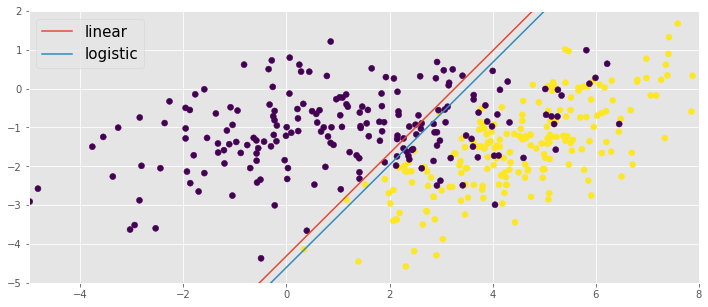

In [9]:
np.random.seed(0)

C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])
y = np.r_[np.ones(200), np.zeros(200)]

plt.scatter(X[:, 0], X[:, 1], c=y)

my_clf = MySGDClassifier(batch_generator, C=200,
                         model_type='lin_reg', alpha=0.05, max_epoch=30)
my_clf.fit(X, 2*y-1)
my_clf_log = MySGDClassifier(batch_generator, model_type='log_reg',
                             alpha=0.01, C=1000)
my_clf_log.fit(X, y)

plt.xlim(-5, 8)
plt.ylim(-5, 2)
plot_decision_boundary(my_clf)
plot_decision_boundary(my_clf_log)

Далее будем анализировать Ваш алгоритм. 
Для этих заданий используйте датасет ниже.

In [10]:
from sklearn.datasets import make_classification

In [11]:
X, y = make_classification(n_samples=100000, n_features=10,
                           n_informative=4, n_redundant=0,
                           random_state=123, class_sep=1.0,
                           n_clusters_per_class=1)

Покажите сходимости обеих регрессией на этом датасете: изобразите график  функции потерь, усредненной по $N$ шагам градиентого спуска, для разных `alpha` (размеров шага). Разные `alpha` расположите на одном графике. 

$N$ можно брать 10, 50, 100 и т.д. 

In [12]:
# Your Code Here
alphas = np.linspace(0.1, 1, 5)
N = 100

In [13]:
# Your Code Here
alpha_array = np.linspace(0.1, 1, 5)
N = 100
plot_log = []

plot_lin = []
for alpha in alpha_array:
    clf_lin = MySGDClassifier(
        batch_generator, alpha=alpha, batch_size=100, C=1000, max_epoch=20)
    clf_log = MySGDClassifier(batch_generator, alpha=alpha,
                              model_type='log_reg', batch_size=100, C=1000, max_epoch=20)

    clf_lin.fit(X, 2*y-1)
    clf_log.fit(X, y)

    max_epoch = clf_lin.max_epoch

    log_loss = []
    lin_loss = []

    loss_mean_lin = np.mean(
        (np.array_split(clf_lin.errors_log['loss'], max_epoch)), axis=1)

    loss_log = np.array(clf_log.errors_log['loss'])
    lin_log = np.array(clf_lin.errors_log['loss'])
    for i in range(loss_log.shape[0] // N):
        log_loss.append(loss_log[i * N: (i + 1) * N].mean())
        lin_loss.append(lin_log[i * N: (i + 1) * N].mean())

    plot_log.append(log_loss)
    plot_lin.append(lin_loss)

[]

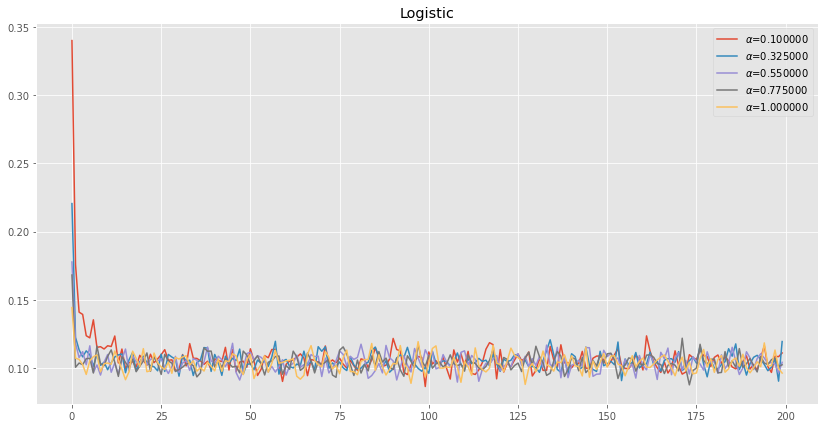

In [14]:
fig = plt.figure(figsize=(14, 7))
for i, alpha in enumerate(alpha_array):
    plt.plot(plot_log[i][:], label='$\\alpha$=%f' % (alpha))
plt.subplots_adjust(wspace=0.0, hspace=0.2)
plt.legend()
plt.title('Logistic')
plt.plot()

[]

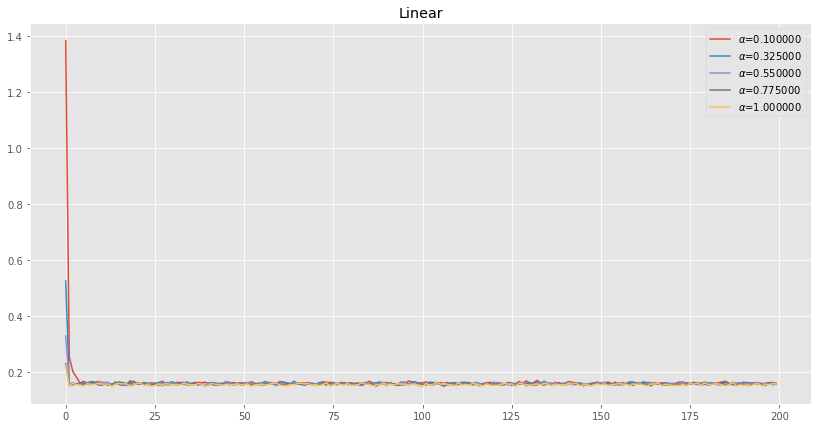

In [15]:
fig = plt.figure(figsize=(14, 7))
for i, alpha in enumerate(alpha_array):
    plt.plot(plot_lin[i][0:], label='$\\alpha$=%f' % (alpha))
plt.subplots_adjust(wspace=0.0, hspace=0.2)
plt.legend()
plt.title('Linear')
plt.plot()

Что Вы можете сказать про сходимость метода при различных `alpha`? Какое значение стоит выбирать для лучшей сходимости?

Сходимость происходит быстрее при больших `alpha`, но и ошибка больше. При маленьких `alpha` получаем обратную ситуацию

Изобразите график среднего значения весов для обеих регрессий в зависимости от коеф. регуляризации С из `np.logspace(3, -3, 10)` 

In [16]:
# Your Code Here
C_array = np.logspace(3, -3, 10)
weights_log = []
weights_lin = []
for C in C_array:
    clf_lin = MySGDClassifier(
        batch_generator, batch_size=10000, alpha=0.01, C=C, max_epoch=50)
    clf_log = MySGDClassifier(batch_generator, batch_size=10000,
                              alpha=0.01, model_type='log_reg', C=C, max_epoch=50)

    clf_lin.fit(X, 2*y-1)
    clf_log.fit(X, y)

    weights_lin.append((clf_lin.weights*clf_lin.weights).mean())

    weights_log.append((clf_log.weights*clf_log.weights).mean())

<ipython-input-7-d7aeccb67c4b>:51: RuntimeWarning: divide by zero encountered in log2
  (1-y_batch)*np.log2(1-y_pred))
<ipython-input-7-d7aeccb67c4b>:51: RuntimeWarning: invalid value encountered in multiply
  (1-y_batch)*np.log2(1-y_pred))
<ipython-input-7-d7aeccb67c4b>:11: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))
<ipython-input-7-d7aeccb67c4b>:50: RuntimeWarning: divide by zero encountered in log2
  loss = np.mean(-y_batch*np.log2(y_pred) -
<ipython-input-7-d7aeccb67c4b>:50: RuntimeWarning: invalid value encountered in multiply
  loss = np.mean(-y_batch*np.log2(y_pred) -
<ipython-input-7-d7aeccb67c4b>:52: RuntimeWarning: overflow encountered in double_scalars
  reg = np.sum(self.weights[1:]**2)/self.C
/home/kirill/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-7-d7aeccb67c4b>:52: RuntimeWarning: overflow encountered in

Text(0, 0.5, 'mean_weights')

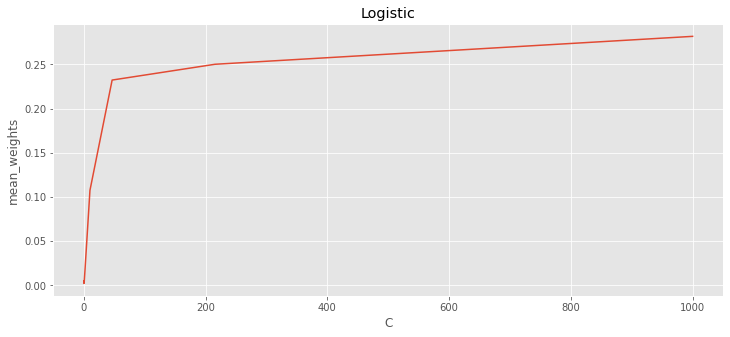

In [17]:
plt.plot(C_array, weights_log, label='logistic')
plt.title('Logistic')
plt.xlabel('C')
plt.ylabel('mean_weights')

Text(0, 0.5, 'mean_weights')

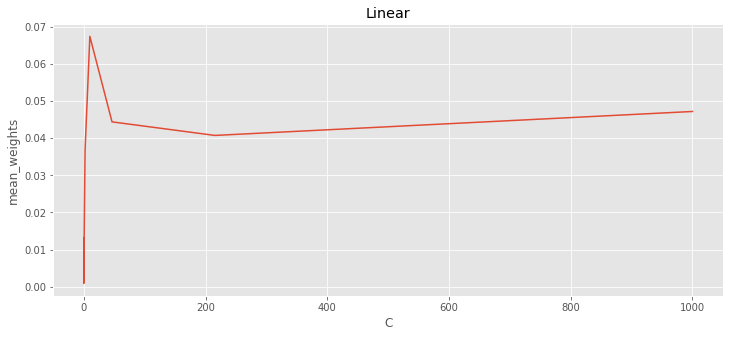

In [18]:
plt.plot(C_array, weights_lin, label='linear')
plt.title('Linear')
plt.xlabel('C')
plt.ylabel('mean_weights')

Довольны ли Вы, насколько сильно уменьшились Ваши веса? 

# Боевое применение (4  балла)

**Защита данной части возможна только при преодолении в проекте бейзлайна Handmade baseline.**

Давайте применим модель на итоговом проекте! Датасет сделаем точно таким же образом, как было показано в project_overview.ipynb

Применим обе регрессии, подберем для них параметры и сравним качество. Может быть Вы еще одновременно с решением домашней работы подрастете на лидерборде!

In [19]:
doc_to_title = {}
with open('docs_titles.tsv') as f:
    for num_line, line in enumerate(f):
        if num_line == 0:
            continue
        data = line.strip().split('\t', 1)
        doc_id = int(data[0])
        if len(data) == 1:
            title = ''
        else:
            title = data[1]
        doc_to_title[doc_id] = title
print(len(doc_to_title))

28026


In [20]:
import pandas as pd
train_data = pd.read_csv('train_groups.csv')
traingroups_titledata = {}
for i in range(len(train_data)):
    new_doc = train_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    target = new_doc['target']
    title = doc_to_title[doc_id]
    if doc_group not in traingroups_titledata:
        traingroups_titledata[doc_group] = []
    traingroups_titledata[doc_group].append((doc_id, title, target))

In [21]:
import numpy as np
y_train = []
X_train = []
groups_train = []
for new_group in traingroups_titledata:
    docs = traingroups_titledata[new_group]
    for k, (doc_id, title, target_id) in enumerate(docs):
        y_train.append(target_id)
        groups_train.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j, target_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_train.append(sorted(all_dist, reverse=True)[0:15])
X_train = np.array(X_train)
y_train = np.array(y_train)
groups_train = np.array(groups_train)
print(X_train.shape, y_train.shape, groups_train.shape)

(11690, 15) (11690,) (11690,)


Подберите размер батча для обучения. Линейная модель не должна учиться дольше нескольких минут. 

Не забывайте использовать скейлер!

In [22]:
from sklearn.metrics import f1_score, make_scorer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GroupKFold, cross_val_score, GridSearchCV

Разбейте данные на обучение и валидацию. Подберите параметры C, alpha, max_epoch, model_type на валидации (Вы же помните, как правильно в этой задаче делать валидацию?)

In [23]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

In [24]:
clf_log = MySGDClassifier(
    batch_generator, batch_size=100, model_type='log_reg')

In [25]:
param_grid = {'C': [100, 1000, np.inf],
              'alpha': np.logspace(-4, -1, 6),
              'max_epoch': list(range(8, 20, 2))}

In [26]:
grid_search = GridSearchCV(clf_log, param_grid, cv=GroupKFold(
    n_splits=5), scoring=make_scorer(f1_score))

In [27]:
grid_search.fit(X_train_scaled, y_train, groups_train)

/home/kirill/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass groups=[  1   1   1 ... 129 129 129] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
<ipython-input-7-d7aeccb67c4b>:51: RuntimeWarning: divide by zero encountered in log2
  (1-y_batch)*np.log2(1-y_pred))
<ipython-input-7-d7aeccb67c4b>:51: RuntimeWarning: invalid value encountered in multiply
  (1-y_batch)*np.log2(1-y_pred))


GridSearchCV(cv=GroupKFold(n_splits=5),
             estimator=MySGDClassifier(batch_generator=<function batch_generator at 0x7f5870337280>,
                                       batch_size=100, model_type='log_reg'),
             param_grid={'C': [100, 1000, inf],
                         'alpha': array([0.0001    , 0.00039811, 0.00158489, 0.00630957, 0.02511886,
       0.1       ]),
                         'max_epoch': [8, 10, 12, 14, 16, 18]},
             scoring=make_scorer(f1_score))

In [28]:
grid_search.best_params_

{'C': inf, 'alpha': 0.00630957344480193, 'max_epoch': 8}

In [29]:
clf_log_best = grid_search.best_estimator_

In [30]:
cross_val_score(clf_log_best, X_train_scaled, y_train,
                groups=groups_train, scoring=make_scorer(f1_score))

<ipython-input-7-d7aeccb67c4b>:51: RuntimeWarning: divide by zero encountered in log2
  (1-y_batch)*np.log2(1-y_pred))
<ipython-input-7-d7aeccb67c4b>:51: RuntimeWarning: invalid value encountered in multiply
  (1-y_batch)*np.log2(1-y_pred))


array([0.55299539, 0.62006079, 0.61196319, 0.56650586, 0.67476038])

In [31]:
cross_val_score(clf_log_best, X_train_scaled, y_train,
                groups=groups_train, scoring=make_scorer(f1_score)).mean()

<ipython-input-7-d7aeccb67c4b>:51: RuntimeWarning: divide by zero encountered in log2
  (1-y_batch)*np.log2(1-y_pred))
<ipython-input-7-d7aeccb67c4b>:51: RuntimeWarning: invalid value encountered in multiply
  (1-y_batch)*np.log2(1-y_pred))


0.5973785955384664

Подберите порог линейной модели, по достижении которого, Вы будете относить объект к классу 1. Вспомните, какую метрику мы оптимизируем в соревновании.  Как тогда правильно подобрать порог?

In [32]:
threshold = {'threshold': np.arange(0.3, 0.8, 0.05)}

In [33]:
grid_search_threshold = GridSearchCV(clf_log_best, threshold, cv=GroupKFold(
    n_splits=5), scoring=make_scorer(f1_score))

In [34]:
grid_search_threshold.fit(X_train_scaled, y_train, groups_train)

/home/kirill/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass groups=[  1   1   1 ... 129 129 129] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
<ipython-input-7-d7aeccb67c4b>:51: RuntimeWarning: divide by zero encountered in log2
  (1-y_batch)*np.log2(1-y_pred))
<ipython-input-7-d7aeccb67c4b>:51: RuntimeWarning: invalid value encountered in multiply
  (1-y_batch)*np.log2(1-y_pred))


GridSearchCV(cv=GroupKFold(n_splits=5),
             estimator=MySGDClassifier(C=inf, alpha=0.00630957344480193,
                                       batch_generator=<function batch_generator at 0x7f5870337280>,
                                       batch_size=100, max_epoch=8,
                                       model_type='log_reg'),
             param_grid={'threshold': array([0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75])},
             scoring=make_scorer(f1_score))

In [35]:
grid_search_threshold.best_params_

{'threshold': 0.44999999999999996}

In [36]:
clf_log_best = grid_search_threshold.best_estimator_

In [37]:
cross_val_score(clf_log_best, X_train_scaled, y_train,
                groups=groups_train, scoring=make_scorer(f1_score)).mean()

<ipython-input-7-d7aeccb67c4b>:51: RuntimeWarning: divide by zero encountered in log2
  (1-y_batch)*np.log2(1-y_pred))
<ipython-input-7-d7aeccb67c4b>:51: RuntimeWarning: invalid value encountered in multiply
  (1-y_batch)*np.log2(1-y_pred))


0.6094257188865223

С лучшими параметрами на валидации сделайте предсказание на тестовом множестве, отправьте его на проверку на платформу kaggle. Убедитесь, что Вы смогли побить public score первого бейзлайна.

In [38]:
test_data = pd.read_csv('test_groups.csv')
testgroups_titledata = {}
for i in range(len(test_data)):
    new_doc = test_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    title = doc_to_title[doc_id]
    if doc_group not in testgroups_titledata:
        testgroups_titledata[doc_group] = []
    testgroups_titledata[doc_group].append((doc_id, title))

In [39]:
X_test = []
groups_test = []
for new_group in testgroups_titledata:
    docs = testgroups_titledata[new_group]
    for k, (doc_id, title) in enumerate(docs):
        groups_test.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_test.append(sorted(all_dist, reverse=True)[0:15])
X_test = np.array(X_test)
groups_test = np.array(groups_test)
print(X_test.shape, groups_test.shape)

(16627, 15) (16627,)


In [40]:
X_test_scaled = scaler.transform(X_test)

y_pred = clf_log_best.predict(X_test_scaled)

y_pred = y_pred.astype(int)

answer = pd.DataFrame({'pair_id': np.asarray(
    test_data['pair_id']), 'target': y_pred})

answer = answer.set_index(['pair_id'])

answer.to_csv('submission.csv')

** При сдаче домашки Вам необходимо кроме ссылки на ноутбук показать Ваш ник на kaggle, под которым Вы залили решение, которое побило Handmade baseline. **

Kirill Kovalkov

# Фидбек (бесценно)

* Какие аспекты обучения линейных моделей Вам показались непонятными? Какое место стоит дополнительно объяснить?

***Ваше ответ здесь***

* Здесь Вы можете оставить отзыв о этой домашней работе или о всем курсе.   

*** ВАШ ОТЗЫВ ЗДЕСЬ***